<a href="https://colab.research.google.com/github/frnunez/SU-Grad-Portfolio/blob/master/Covid/NYC_DOH_Covid_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import json

# Git Repo URL
url="https://github.com/frnunez/nyc-doh-coronavirus-data/raw/master"


# import data
daily_data = f'{url}/trends/data-by-day.csv'
testing_data = f'{url}/trends/tests.csv'
zipcode_data = f'{url}/totals/data-by-modzcta.csv'

### Cases, Hospitalizations, Deaths

In [2]:
# create daily counts dataframe for cases, hospitalizations, deaths
daily_df = pd.read_csv(daily_data)
daily_df.head()

date_of_interest  CASE_COUNT  ...  SI_DEATH_COUNT_7DAY_AVG  INCOMPLETE
0       02/29/2020           1  ...                        0           0
1       03/01/2020           0  ...                        0           0
2       03/02/2020           0  ...                        0           0
3       03/03/2020           1  ...                        0           0
4       03/04/2020           5  ...                        0           0

[5 rows x 39 columns]

In [3]:
daily_df.dtypes

date_of_interest                  object
CASE_COUNT                         int64
HOSPITALIZED_COUNT                 int64
DEATH_COUNT                        int64
DEATH_COUNT_PROBABLE               int64
CASE_COUNT_7DAY_AVG                int64
HOSP_COUNT_7DAY_AVG                int64
DEATH_COUNT_7DAY_AVG               int64
BX_CASE_COUNT                      int64
BX_HOSPITALIZED_COUNT              int64
BX_DEATH_COUNT                     int64
BX_CASE_COUNT_7DAY_AVG             int64
BX_HOSPITALIZED_COUNT_7DAY_AVG     int64
BX_DEATH_COUNT_7DAY_AVG            int64
BK_CASE_COUNT                      int64
BK_HOSPITALIZED_COUNT              int64
BK_DEATH_COUNT                     int64
BK_CASE_COUNT_7DAY_AVG             int64
BK_HOSPITALIZED_COUNT_7DAY_AVG     int64
BK_DEATH_COUNT_7DAY_AVG            int64
MN_CASE_COUNT                      int64
MN_HOSPITALIZED_COUNT              int64
MN_DEATH_COUNT                     int64
MN_CASE_COUNT_7DAY_AVG             int64
MN_HOSPITALIZED_

In [4]:
# turn into a time series
daily_ts = daily_df
daily_ts['date_of_interest'] = pd.to_datetime(daily_ts['date_of_interest'])
#daily_ts['DATE_OF_INTEREST'] = daily_ts['DATE_OF_INTEREST'].dt.strftime('%Y-%m-%d')
#daily_ts = daily_ts.set_index('DATE_OF_INTEREST')
daily_ts.head()

date_of_interest  CASE_COUNT  ...  SI_DEATH_COUNT_7DAY_AVG  INCOMPLETE
0       2020-02-29           1  ...                        0           0
1       2020-03-01           0  ...                        0           0
2       2020-03-02           0  ...                        0           0
3       2020-03-03           1  ...                        0           0
4       2020-03-04           5  ...                        0           0

[5 rows x 39 columns]

In [5]:
# Create Lists for plotting
dates = daily_ts['date_of_interest'].tolist()
cases = daily_ts['CASE_COUNT'].tolist()
sevendaycases = daily_ts['CASE_COUNT_7DAY_AVG'].tolist()
hospitalizations = daily_ts['HOSPITALIZED_COUNT'].tolist()
sevendayhosp = daily_ts['HOSP_COUNT_7DAY_AVG'].tolist()
deaths = daily_ts['DEATH_COUNT'].tolist()
sevendaydeaths = daily_ts['DEATH_COUNT_7DAY_AVG'].tolist()

In [6]:
# see date range
daily_ts['date_of_interest']

0     2020-02-29
1     2020-03-01
2     2020-03-02
3     2020-03-03
4     2020-03-04
         ...    
263   2020-11-18
264   2020-11-19
265   2020-11-20
266   2020-11-21
267   2020-11-22
Name: date_of_interest, Length: 268, dtype: datetime64[ns]

In [7]:
# Date range
print("The date range is",dates[0],"to",dates[-1] )

The date range is 2020-02-29 00:00:00 to 2020-11-22 00:00:00


In [8]:
# Create borough Lists for plotting

# Bronx
bxcases = daily_ts['BX_CASE_COUNT'].tolist()
bxsevendaycases = daily_ts['BX_CASE_COUNT_7DAY_AVG'].tolist()
bxhospitalizations = daily_ts['BX_HOSPITALIZED_COUNT'].tolist()
bxsevendayhosp = daily_ts['BX_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
bxdeaths = daily_ts['BX_DEATH_COUNT'].tolist()
bxsevendaydeaths = daily_ts['BX_DEATH_COUNT_7DAY_AVG'].tolist()

# Brooklyn
bkcases = daily_ts['BK_CASE_COUNT'].tolist()
bksevendaycases = daily_ts['BK_CASE_COUNT_7DAY_AVG'].tolist()
bkhospitalizations = daily_ts['BK_HOSPITALIZED_COUNT'].tolist()
bksevendayhosp = daily_ts['BK_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
bkdeaths = daily_ts['BK_DEATH_COUNT'].tolist()
bksevendaydeaths = daily_ts['BK_DEATH_COUNT_7DAY_AVG'].tolist()

# Manhattan
mncases = daily_ts['MN_CASE_COUNT'].tolist()
mnsevendaycases = daily_ts['MN_CASE_COUNT_7DAY_AVG'].tolist()
mnhospitalizations = daily_ts['MN_HOSPITALIZED_COUNT'].tolist()
mnsevendayhosp = daily_ts['MN_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
mndeaths = daily_ts['MN_DEATH_COUNT'].tolist()
mnsevendaydeaths = daily_ts['MN_DEATH_COUNT_7DAY_AVG'].tolist()

# Queens
qncases = daily_ts['QN_CASE_COUNT'].tolist()
qnsevendaycases = daily_ts['QN_CASE_COUNT_7DAY_AVG'].tolist()
qnhospitalizations = daily_ts['QN_HOSPITALIZED_COUNT'].tolist()
qnsevendayhosp = daily_ts['QN_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
qndeaths = daily_ts['QN_DEATH_COUNT'].tolist()
qnsevendaydeaths = daily_ts['QN_DEATH_COUNT_7DAY_AVG'].tolist()

# Staten Island
sicases = daily_ts['SI_CASE_COUNT'].tolist()
sisevendaycases = daily_ts['SI_CASE_COUNT_7DAY_AVG'].tolist()
sihospitalizations = daily_ts['SI_HOSPITALIZED_COUNT'].tolist()
sisevendayhosp = daily_ts['SI_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
sideaths = daily_ts['SI_DEATH_COUNT'].tolist()
sisevendaydeaths = daily_ts['SI_DEATH_COUNT_7DAY_AVG'].tolist()


In [9]:
# create peakdates function to print out the count and date for each category where we want to look at peaks
def peakdates (count,dates):
  maxcount = max(count)
  peakdayindex = count.index(maxcount)
  peakday = dates[peakdayindex].strftime('%Y-%m-%d')
  #print("Maximum count is", maxcount," which occured on:", peakday)
  print("The peak occured on", peakday,"and had a count of", maxcount)

In [10]:
# Peak # of cases
peakdates(cases,dates)

The peak occured on 2020-04-06 and had a count of 6353


In [11]:
# Peak # of hospitalizations
peakdates(hospitalizations,dates)

The peak occured on 2020-03-30 and had a count of 1835


In [12]:
# Peak # of deaths
peakdates(deaths,dates)

The peak occured on 2020-04-07 and had a count of 599


Text(0.5, 1.0, 'Total Covid-19 Cases in NYC')

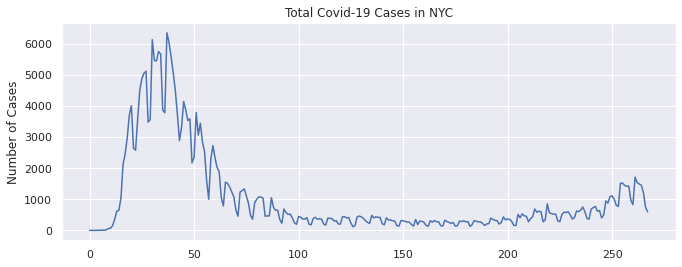

In [13]:
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

#case count plot
ax = daily_df['CASE_COUNT'].plot()
ax.set_ylabel('Number of Cases')
ax.set_title('Total Covid-19 Cases in NYC')

The peak occured on 2020-04-06 and had a count of 6353


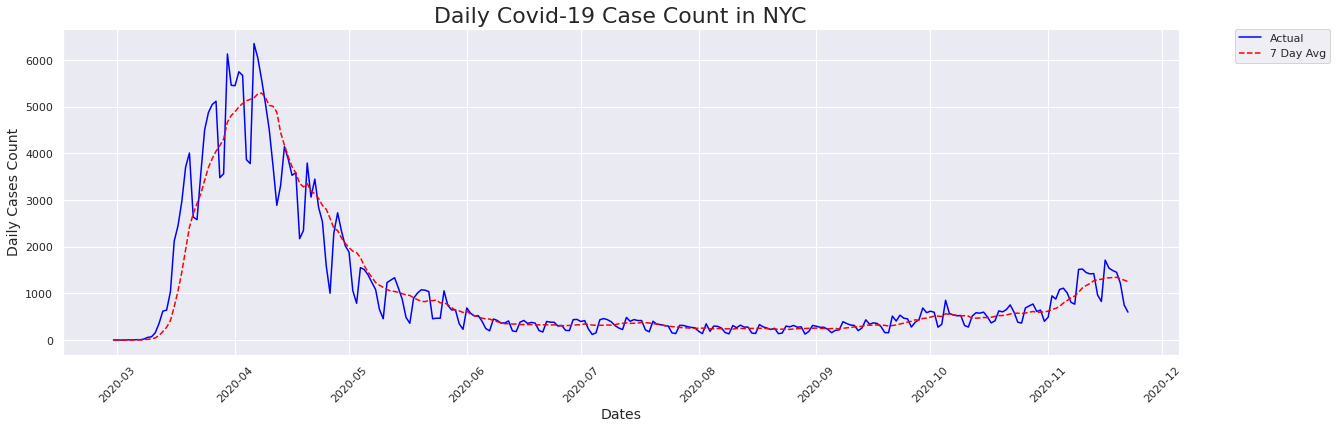

In [14]:
# Cases Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Case Count in NYC', fontsize = 22)
plt.ylabel('Daily Cases Count', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

plt.plot(dates, cases, color="blue", label = "Actual")
plt.plot(dates, sevendaycases, color="red", linestyle="dashed",label="7 Day Avg")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
peakdates(cases,dates)

The peak occured on 2020-11-16 and had a count of 1713


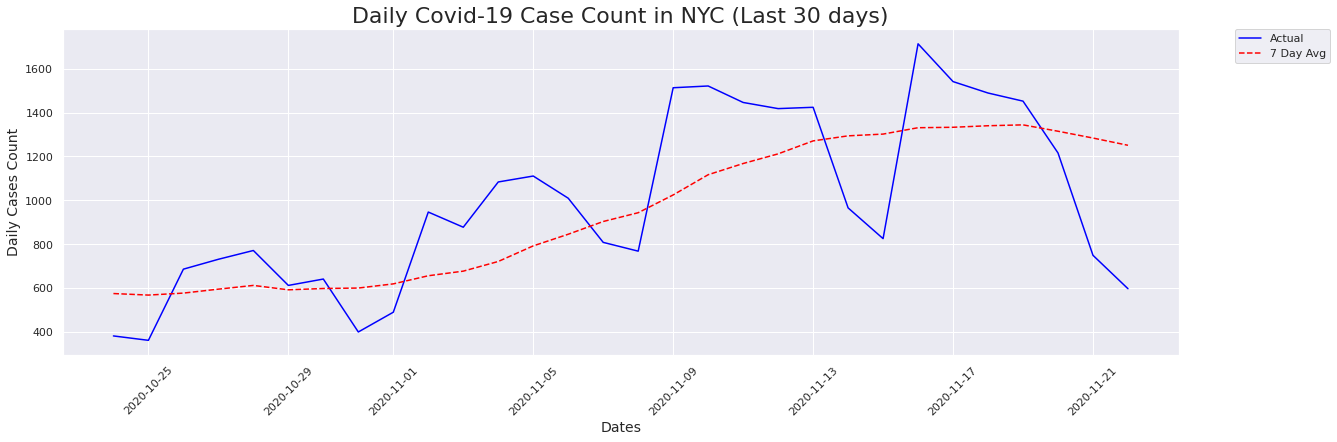

In [15]:
# Last 30 days
# Cases Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Case Count in NYC (Last 30 days)', fontsize = 22)
plt.ylabel('Daily Cases Count', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

plt.plot(dates[-30:], cases[-30:], color="blue", label = "Actual")
plt.plot(dates[-30:], sevendaycases[-30:], color="red", linestyle="dashed",label="7 Day Avg")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
peakdates(cases[-30:],dates[-30:])

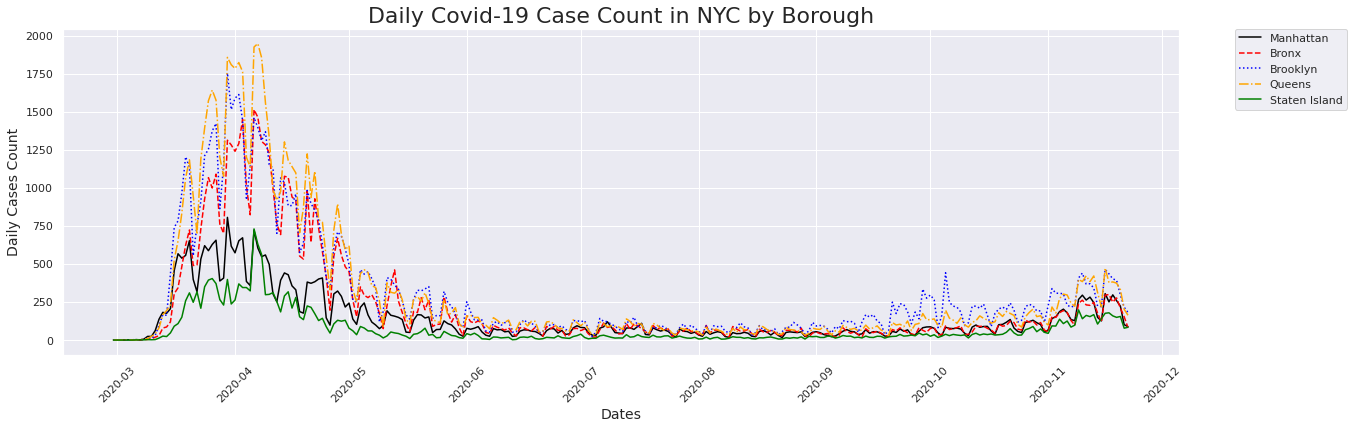

In [16]:
# Cases Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Case Count in NYC by Borough', fontsize = 22)
plt.ylabel('Daily Cases Count', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

#plt.plot(dates, cases)
plt.plot(dates, mncases, label="Manhattan",color="black")
plt.plot(dates, bxcases, label="Bronx",color='red', linestyle='dashed')
plt.plot(dates, bkcases, label="Brooklyn",color="blue", linestyle='dotted')
plt.plot(dates, qncases, label="Queens",color="orange",linestyle='dashdot')
plt.plot(dates, sicases, label="Staten Island",color="green")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(cases,dates)

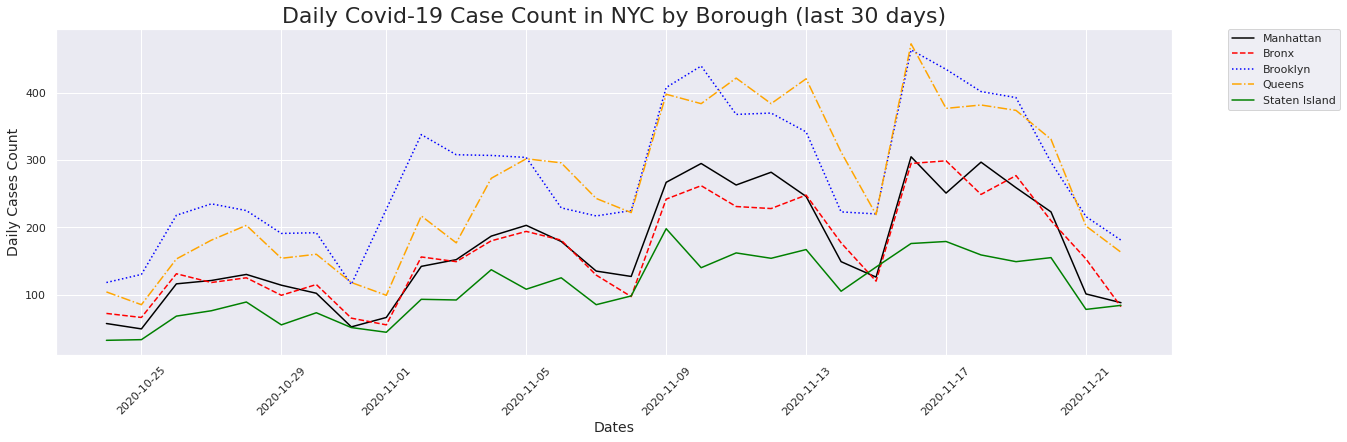

In [17]:
# 30 Day Cases Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Case Count in NYC by Borough (last 30 days)', fontsize = 22)
plt.ylabel('Daily Cases Count', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

#plt.plot(dates, cases)
plt.plot(dates[-30:], mncases[-30:], label="Manhattan",color="black")
plt.plot(dates[-30:], bxcases[-30:], label="Bronx",color='red', linestyle='dashed')
plt.plot(dates[-30:], bkcases[-30:], label="Brooklyn",color="blue", linestyle='dotted')
plt.plot(dates[-30:], qncases[-30:], label="Queens",color="orange",linestyle='dashdot')
plt.plot(dates[-30:], sicases[-30:], label="Staten Island",color="green")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(cases,dates)

The peak occured on 2020-03-30 and had a count of 1835


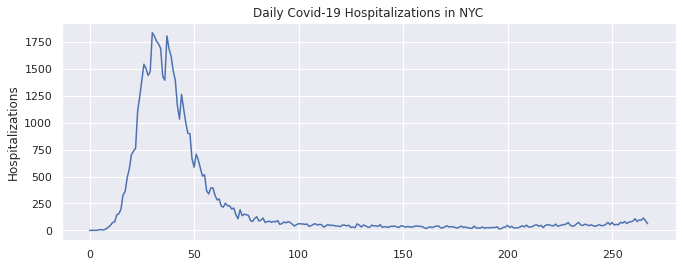

In [18]:
#case count plot
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = daily_df['HOSPITALIZED_COUNT'].plot()
ax.set_ylabel('Hospitalizations')
ax.set_title('Daily Covid-19 Hospitalizations in NYC')
peakdates(hospitalizations,dates)

The peak occured on 2020-03-30 and had a count of 1835


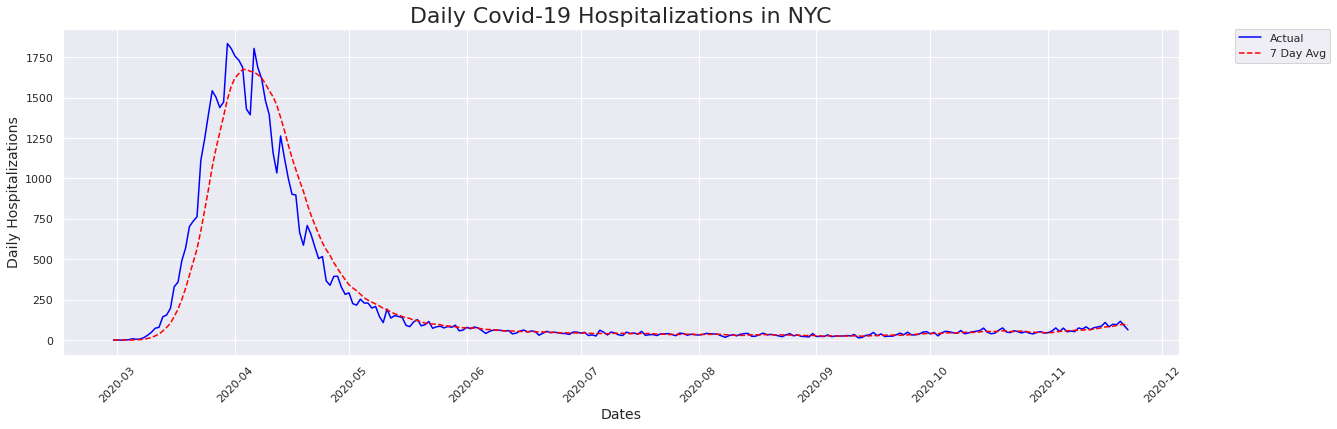

In [19]:
# Hospitalizations Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Hospitalizations in NYC', fontsize = 22)
plt.ylabel('Daily Hospitalizations', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

plt.plot(dates, hospitalizations, color="blue", label = "Actual")
plt.plot(dates, sevendayhosp, color="red", linestyle="dashed",label="7 Day Avg")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
peakdates(hospitalizations,dates)

The peak occured on 2020-11-20 and had a count of 116


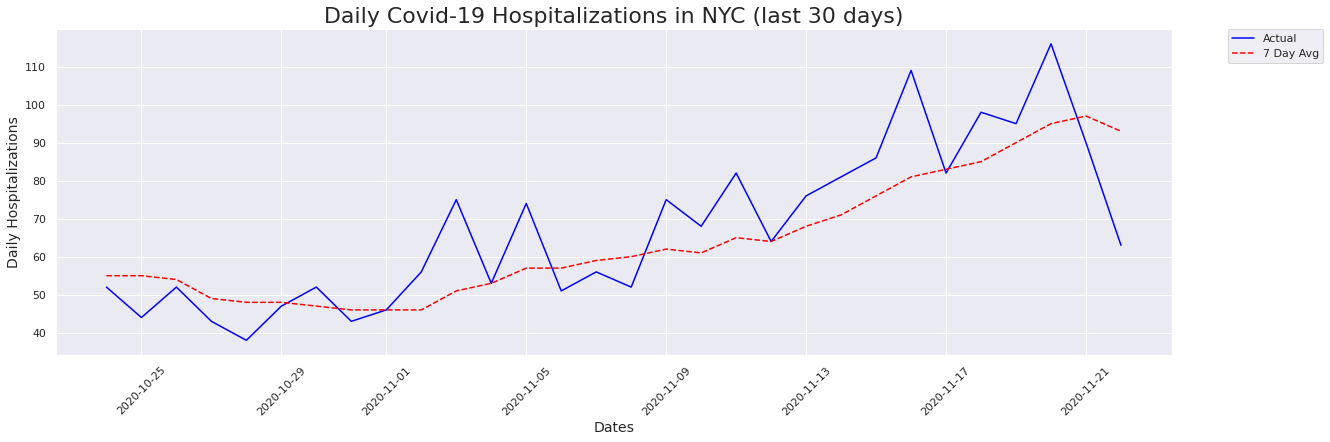

In [20]:
# 30 Day Hospitalizations Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Hospitalizations in NYC (last 30 days)', fontsize = 22)
plt.ylabel('Daily Hospitalizations', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

plt.plot(dates[-30:], hospitalizations[-30:], color="blue", label = "Actual")
plt.plot(dates[-30:], sevendayhosp[-30:], color="red", linestyle="dashed",label="7 Day Avg")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
peakdates(hospitalizations[-30:],dates[-30:])

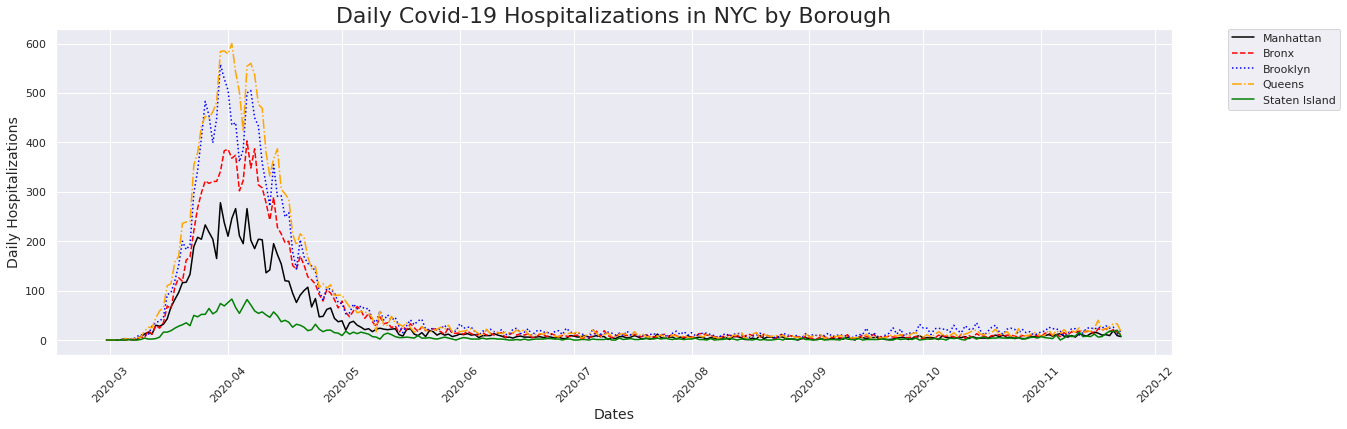

In [21]:
# Hospitalizations Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Hospitalizations in NYC by Borough', fontsize = 22)
plt.ylabel('Daily Hospitalizations', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

#plt.plot(dates, hospitalizations)
plt.plot(dates, mnhospitalizations, label="Manhattan",color="black")
plt.plot(dates, bxhospitalizations, label="Bronx",color='red', linestyle='dashed')
plt.plot(dates, bkhospitalizations, label="Brooklyn",color="blue", linestyle='dotted')
plt.plot(dates, qnhospitalizations, label="Queens",color="orange",linestyle='dashdot')
plt.plot(dates, sihospitalizations, label="Staten Island",color="green")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(hospitalizations,dates)

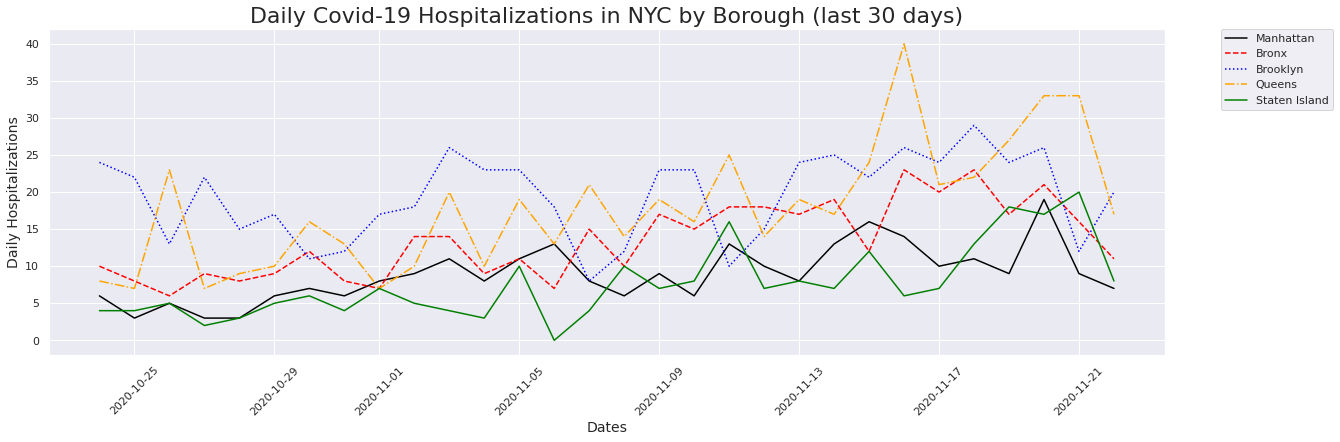

In [22]:
# Hospitalizations Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Hospitalizations in NYC by Borough (last 30 days)', fontsize = 22)
plt.ylabel('Daily Hospitalizations', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

#plt.plot(dates, hospitalizations)
plt.plot(dates[-30:], mnhospitalizations[-30:], label="Manhattan",color="black")
plt.plot(dates[-30:], bxhospitalizations[-30:], label="Bronx",color='red', linestyle='dashed')
plt.plot(dates[-30:], bkhospitalizations[-30:], label="Brooklyn",color="blue", linestyle='dotted')
plt.plot(dates[-30:], qnhospitalizations[-30:], label="Queens",color="orange",linestyle='dashdot')
plt.plot(dates[-30:], sihospitalizations[-30:], label="Staten Island",color="green")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(hospitalizations,dates)

The peak occured on 2020-04-07 and had a count of 599


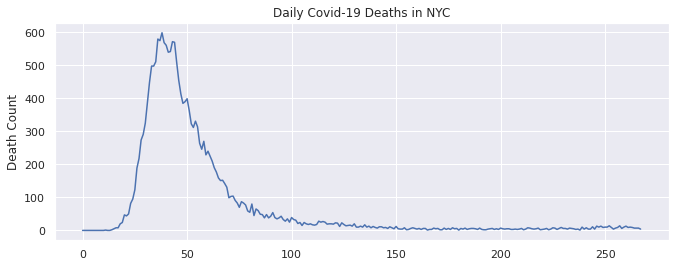

In [23]:
#case count plot
sns.set(rc={'figure.figsize':(11, 4)})
ax = daily_df['DEATH_COUNT'].plot()
ax.set_ylabel('Death Count')
ax.set_title('Daily Covid-19 Deaths in NYC')
peakdates(deaths,dates)

The peak occured on 2020-04-07 and had a count of 599


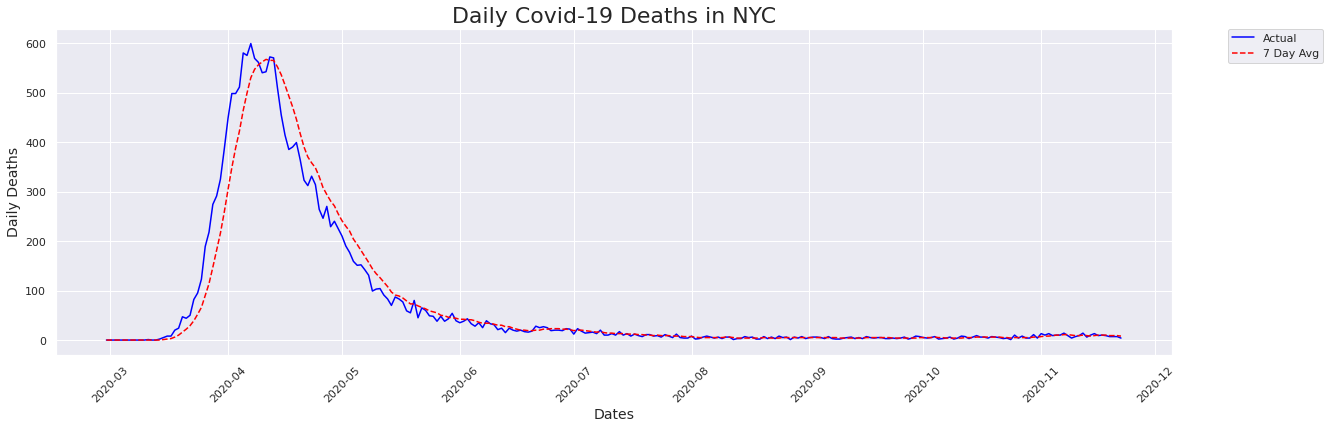

In [24]:
# Deaths Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Deaths in NYC', fontsize = 22)
plt.ylabel('Daily Deaths', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

plt.plot(dates, deaths, color="blue", label = "Actual")
plt.plot(dates, sevendaydeaths, color="red", linestyle="dashed",label="7 Day Avg")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
peakdates(deaths,dates)

The peak occured on 2020-11-07 and had a count of 14


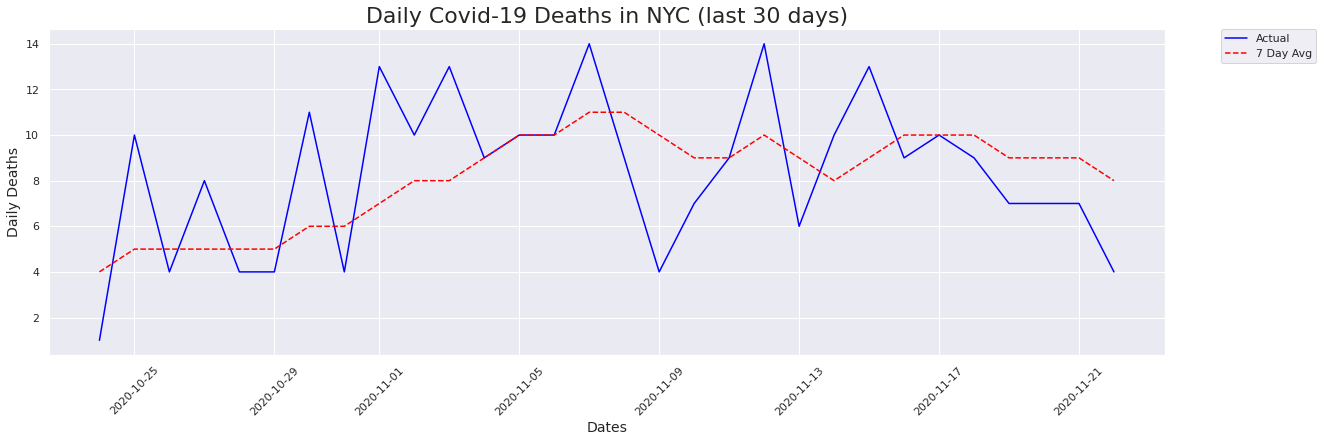

In [25]:
# Deaths Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Deaths in NYC (last 30 days)', fontsize = 22)
plt.ylabel('Daily Deaths', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

plt.plot(dates[-30:], deaths[-30:], color="blue", label = "Actual")
plt.plot(dates[-30:], sevendaydeaths[-30:], color="red", linestyle="dashed",label="7 Day Avg")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
peakdates(deaths[-30:],dates[-30:])

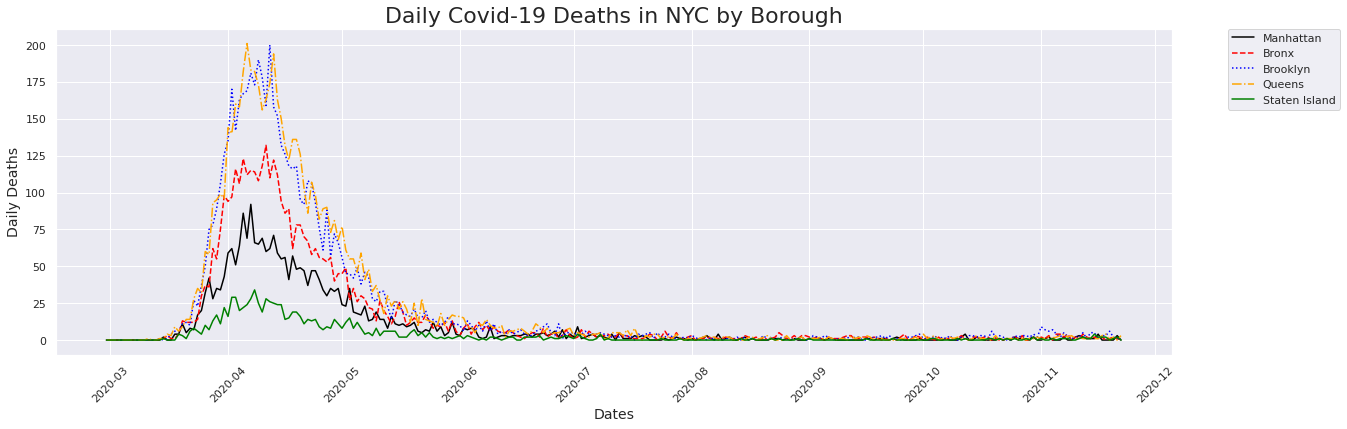

In [26]:
# Deaths Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Deaths in NYC by Borough', fontsize = 22)
plt.ylabel('Daily Deaths', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

#plt.plot(dates, deaths)
plt.plot(dates, mndeaths, label="Manhattan",color="black")
plt.plot(dates, bxdeaths, label="Bronx",color='red', linestyle='dashed')
plt.plot(dates, bkdeaths, label="Brooklyn",color="blue", linestyle='dotted')
plt.plot(dates, qndeaths, label="Queens",color="orange",linestyle='dashdot')
plt.plot(dates, sideaths, label="Staten Island",color="green")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(deaths,dates)

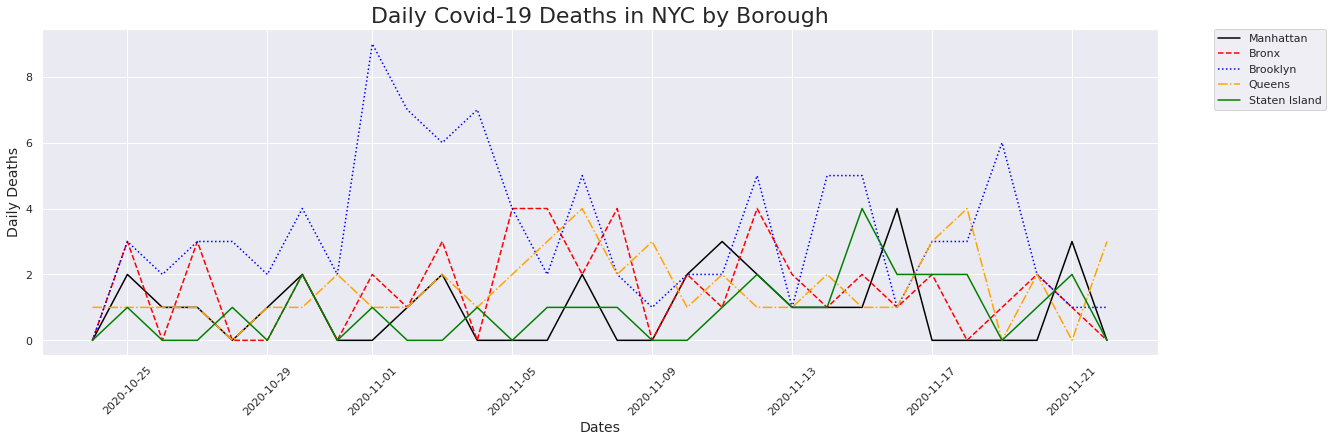

In [27]:
# Deaths Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Deaths in NYC by Borough', fontsize = 22)
plt.ylabel('Daily Deaths', fontsize = 14)
plt.xlabel('Dates', fontsize = 14)

#plt.plot(dates, deaths)
plt.plot(dates[-30:], mndeaths[-30:], label="Manhattan",color="black")
plt.plot(dates[-30:], bxdeaths[-30:], label="Bronx",color='red', linestyle='dashed')
plt.plot(dates[-30:], bkdeaths[-30:], label="Brooklyn",color="blue", linestyle='dotted')
plt.plot(dates[-30:], qndeaths[-30:], label="Queens",color="orange",linestyle='dashdot')
plt.plot(dates[-30:], sideaths[-30:], label="Staten Island",color="green")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(deaths,dates)

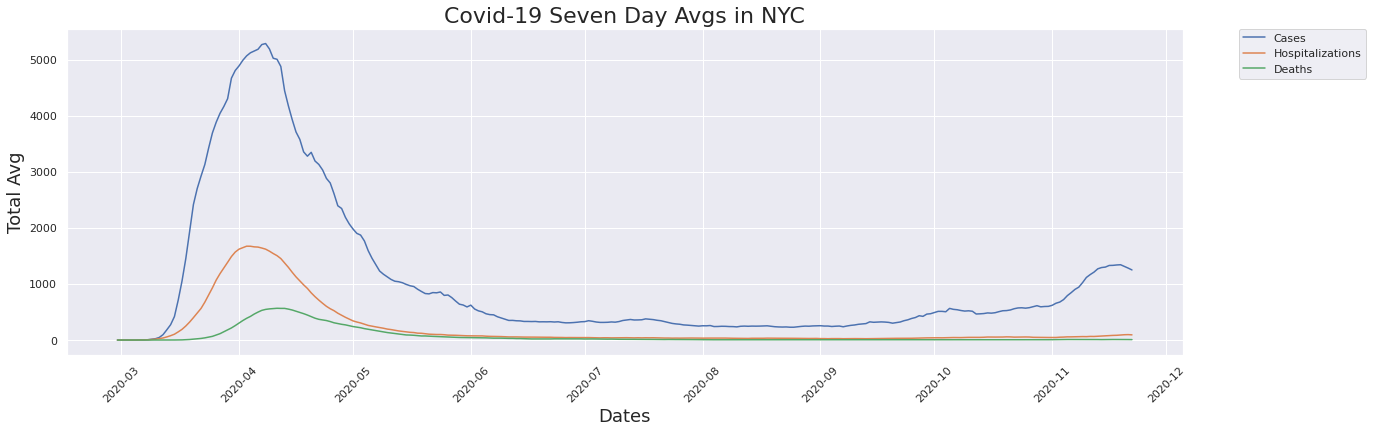

In [28]:
# 7 Day Avgs
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Covid-19 Seven Day Avgs in NYC', fontsize = 22)
plt.ylabel('Total Avg', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

#plt.plot(dates, cases, label="Cases")
plt.plot(dates, sevendaycases, label="Cases")
plt.plot(dates, sevendayhosp, label="Hospitalizations")
plt.plot(dates, sevendaydeaths, label="Deaths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(sevendaycases,dates)

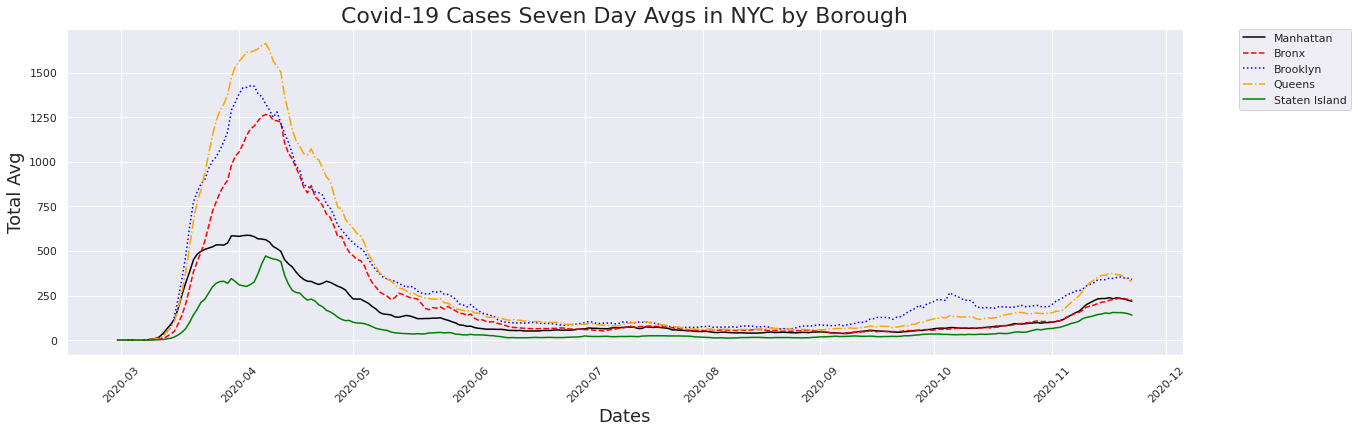

In [29]:
# 7 Day Avgs
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Covid-19 Cases Seven Day Avgs in NYC by Borough', fontsize = 22)
plt.ylabel('Total Avg', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

#plt.plot(dates, sevendaycases, label="Cases")
plt.plot(dates, mnsevendaycases, label="Manhattan",color="black")
plt.plot(dates, bxsevendaycases, label="Bronx",color='red', linestyle='dashed')
plt.plot(dates, bksevendaycases, label="Brooklyn",color="blue", linestyle='dotted')
plt.plot(dates, qnsevendaycases, label="Queens",color="orange",linestyle='dashdot')
plt.plot(dates, sisevendaycases, label="Staten Island",color="green")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(sevendaycases,dates)

### Testing

In [30]:
# create df for data on tests
tests_df = pd.read_csv(testing_data)
tests_df.head()

DATE  TOTAL_TESTS  ...  PERCENT_POSITIVE_7DAYS_AVG  INCOMPLETE
0  03/03/2020           15  ...                         NaN         NaN
1  03/04/2020           33  ...                         NaN         NaN
2  03/05/2020           65  ...                         NaN         NaN
3  03/06/2020           85  ...                         NaN         NaN
4  03/07/2020           72  ...                         NaN         NaN

[5 rows x 8 columns]

In [31]:
tests_df['DAILY_TESTS'] = tests_df.TOTAL_TESTS.diff(periods=1)
tests_df.head()

DATE  TOTAL_TESTS  ...  INCOMPLETE  DAILY_TESTS
0  03/03/2020           15  ...         NaN          NaN
1  03/04/2020           33  ...         NaN         18.0
2  03/05/2020           65  ...         NaN         32.0
3  03/06/2020           85  ...         NaN         20.0
4  03/07/2020           72  ...         NaN        -13.0

[5 rows x 9 columns]

In [32]:
tests_df.dtypes

DATE                           object
TOTAL_TESTS                     int64
POSITIVE_TESTS                  int64
PERCENT_POSITIVE              float64
TOTAL_TESTS_7DAYS_AVG         float64
POSITIVE_TESTS_7DAYS_AVG      float64
PERCENT_POSITIVE_7DAYS_AVG    float64
INCOMPLETE                    float64
DAILY_TESTS                   float64
dtype: object

In [33]:
# turn into a time series
tests_ts = tests_df
tests_ts['DATE'] = pd.to_datetime(tests_ts['DATE'])
tests_ts.head()

DATE  TOTAL_TESTS  ...  INCOMPLETE  DAILY_TESTS
0 2020-03-03           15  ...         NaN          NaN
1 2020-03-04           33  ...         NaN         18.0
2 2020-03-05           65  ...         NaN         32.0
3 2020-03-06           85  ...         NaN         20.0
4 2020-03-07           72  ...         NaN        -13.0

[5 rows x 9 columns]

In [34]:
# Create Lists for plotting
dates = tests_ts['DATE'].tolist()
testtotal = tests_ts['TOTAL_TESTS'].tolist()
postests = tests_ts['POSITIVE_TESTS'].tolist()
posperc = tests_ts['PERCENT_POSITIVE'].tolist()

seventesttotal = tests_ts['TOTAL_TESTS_7DAYS_AVG'].tolist()
sevenpostests = tests_ts['POSITIVE_TESTS_7DAYS_AVG'].tolist()
sevenposperc = tests_ts['PERCENT_POSITIVE_7DAYS_AVG'].tolist()


The peak occured on 2020-11-16 and had a count of 71626


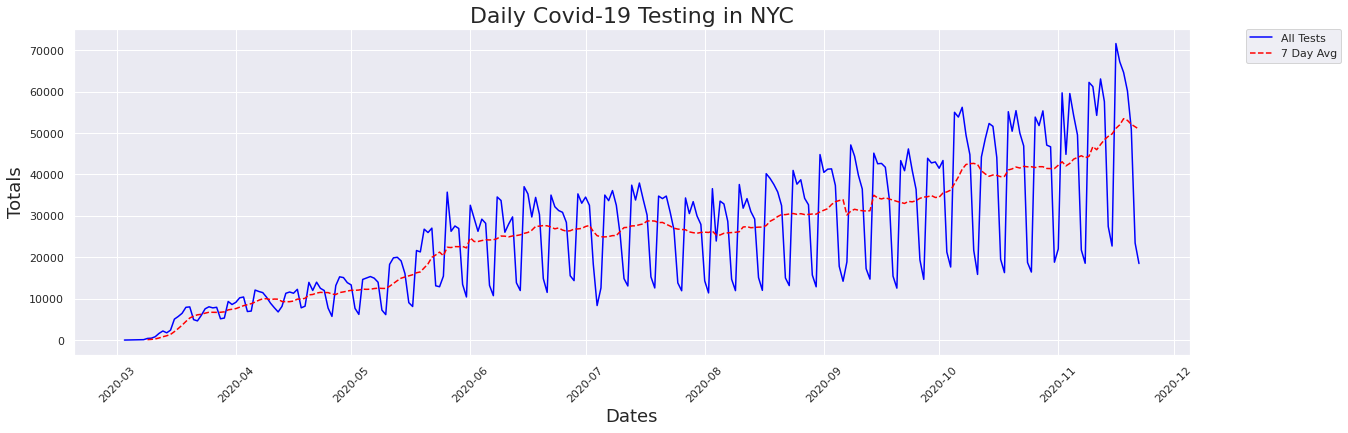

In [35]:
# Daily Testing Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Testing in NYC', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates, testtotal, label="All Tests",color="blue")
plt.plot(dates, seventesttotal, label="7 Day Avg",color="red", linestyle="dashed")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak # of Tests
peakdates(testtotal,dates)

The peak occured on 2020-04-06 and had a count of 6780


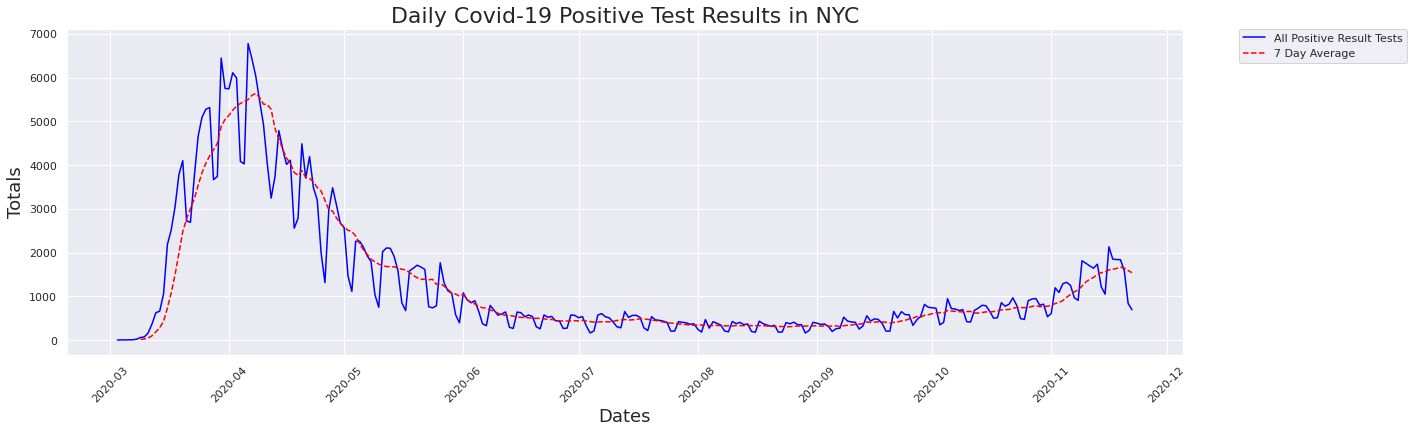

In [36]:
# Daily Positive Tests Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Positive Test Results in NYC', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates, postests, label="All Positive Result Tests",color="blue")
plt.plot(dates, sevenpostests, label="7 Day Average",color="red", linestyle="dashed")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak # of Positive Test Results
peakdates(postests,dates)

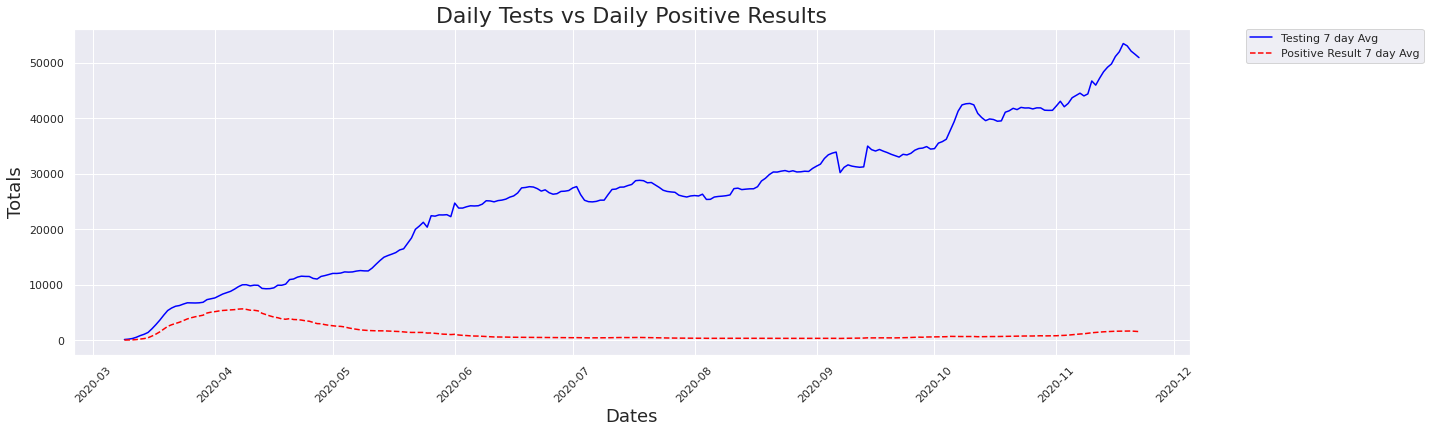

In [37]:
# Daily Testing Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Tests vs Daily Positive Results', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates, seventesttotal, label="Testing 7 day Avg",color="blue")
plt.plot(dates, sevenpostests, label="Positive Result 7 day Avg",color="red", linestyle="dashed")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak # of Tests
#peakdates(testtotal,dates)

The peak occured on 2020-03-28 and had a count of 0.7117


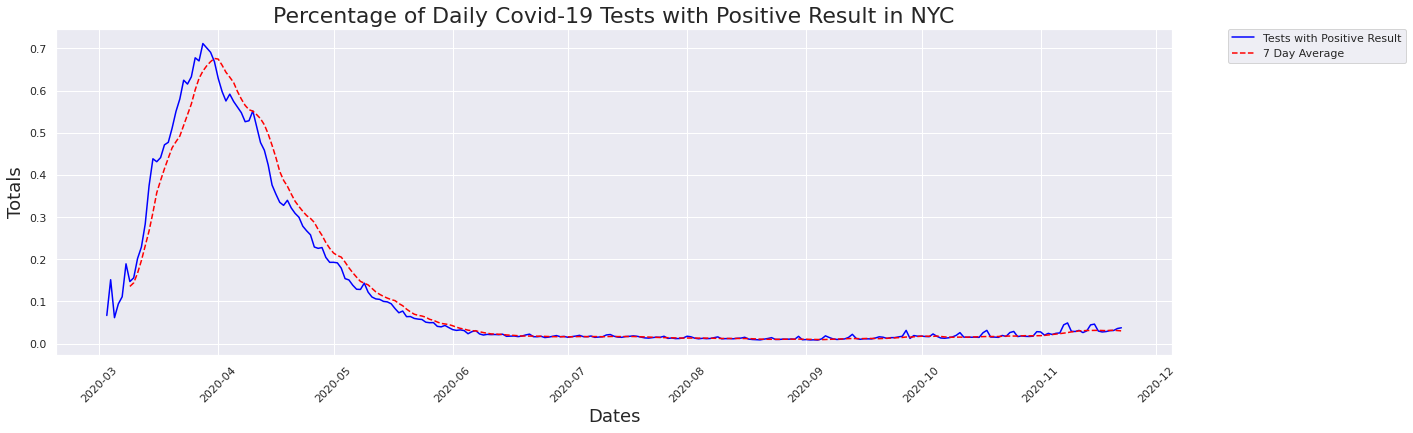

In [38]:
# Daily % Positive Tests Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Percentage of Daily Covid-19 Tests with Positive Result in NYC', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates, posperc, label="Tests with Positive Result",color="blue")
plt.plot(dates, sevenposperc, label="7 Day Average",color="red", linestyle="dashed")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak % of Positive Test Results
peakdates(posperc,dates)

The peak occured on 2020-11-08 and had a count of 0.049
The max positive result was 4.9 %
The max positive 7day avg result was 3.16 %


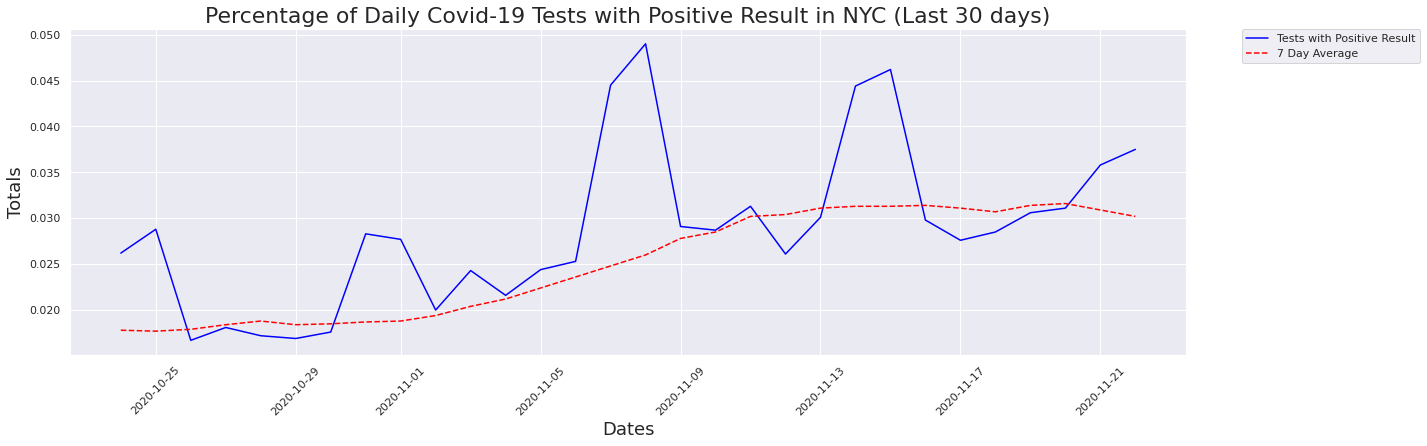

In [39]:
# Last 30 days Daily % Positive Tests Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Percentage of Daily Covid-19 Tests with Positive Result in NYC (Last 30 days)', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates[-30:], posperc[-30:], label="Tests with Positive Result",color="blue")
plt.plot(dates[-30:], sevenposperc[-30:], label="7 Day Average",color="red", linestyle="dashed")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak % of Positive Test Results
peakdates(posperc[-30:],dates[-30:])
print("The max positive result was",max(posperc[-30:])*100,"%")
print("The max positive 7day avg result was",max(sevenposperc[-30:])*100,"%")

The peak occured on 2020-11-15 and had a count of 0.0462
The max positive result was 4.62 %
The max positive 7day avg result was 3.16 %


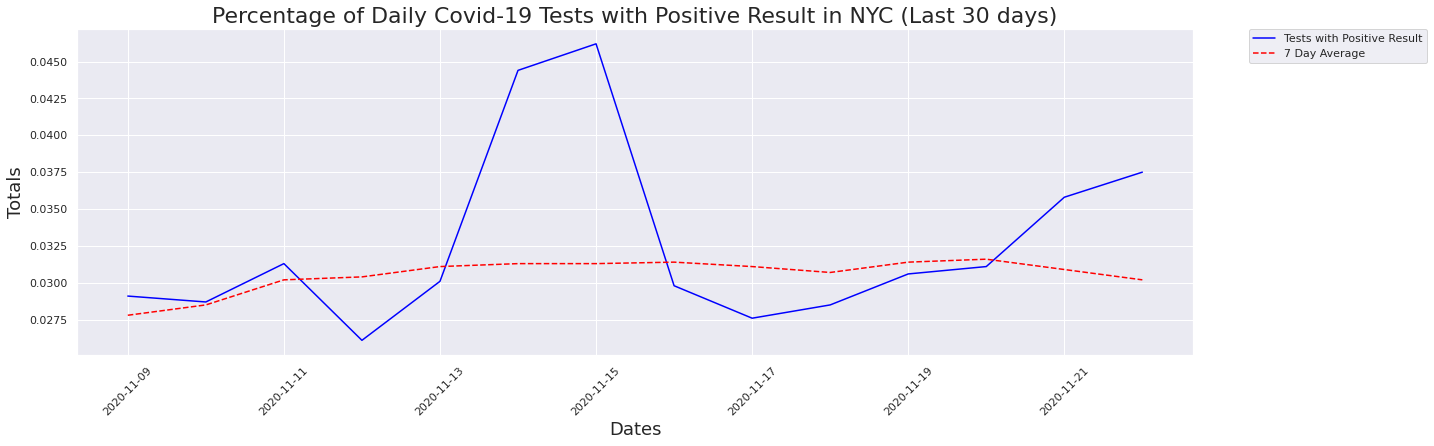

In [40]:
# Last 2 weeks Daily % Positive Tests Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Percentage of Daily Covid-19 Tests with Positive Result in NYC (Last 30 days)', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates[-14:], posperc[-14:], label="Tests with Positive Result",color="blue")
plt.plot(dates[-14:], sevenposperc[-14:], label="7 Day Average",color="red", linestyle="dashed")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak % of Positive Test Results
peakdates(posperc[-14:],dates[-14:])
print("The max positive result was",max(posperc[-14:])*100,"%")
print("The max positive 7day avg result was",max(sevenposperc[-14:])*100,"%")


The peak occured on 2020-11-22 and had a count of 0.0375
The max positive result was 3.75 %
The max positive 7day avg result was 3.16 %


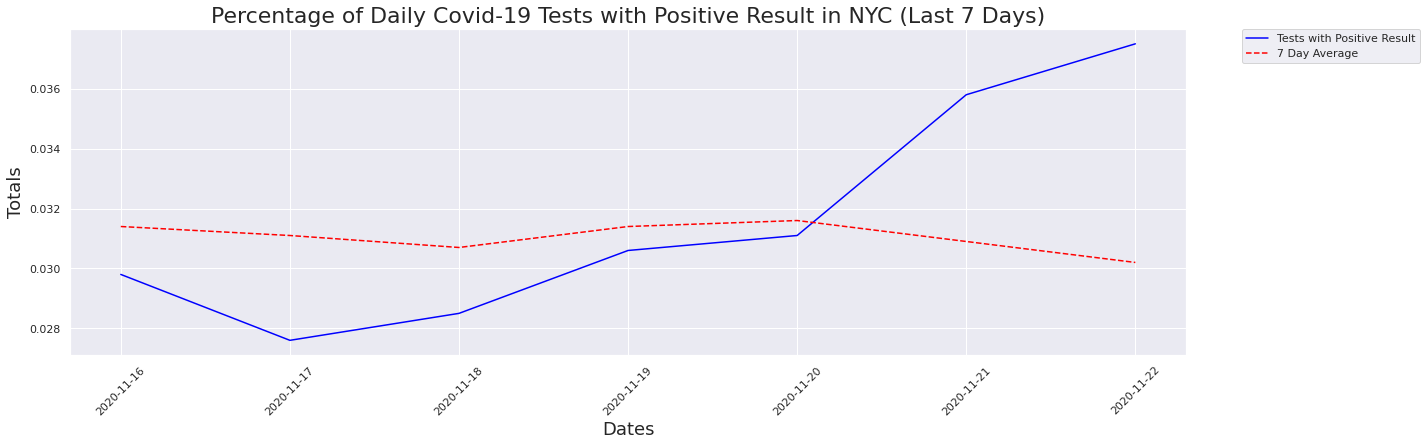

In [41]:
# Last 2 weeks Daily % Positive Tests Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Percentage of Daily Covid-19 Tests with Positive Result in NYC (Last 7 Days)', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates[-7:], posperc[-7:], label="Tests with Positive Result",color="blue")
plt.plot(dates[-7:], sevenposperc[-7:], label="7 Day Average",color="red", linestyle="dashed")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak % of Positive Test Results
peakdates(posperc[-7:],dates[-7:])
print("The max positive result was",max(posperc[-7:])*100,"%")
print("The max positive 7day avg result was",max(sevenposperc[-7:])*100,"%")

### Maps

#### Zip Code Data

In [42]:
# Import Data by Zip Codes
zip_df = pd.read_csv(zipcode_data)
zip_df.head()

MODIFIED_ZCTA  ... TOTAL_COVID_TESTS
0          10001  ...             11990
1          10002  ...             28812
2          10003  ...             29598
3          10004  ...              1896
4          10005  ...              3796

[5 rows x 10 columns]

In [43]:
# Explore Data Types
zip_df.dtypes

MODIFIED_ZCTA          int64
NEIGHBORHOOD_NAME     object
BOROUGH_GROUP         object
COVID_CASE_COUNT       int64
COVID_CASE_RATE      float64
POP_DENOMINATOR      float64
COVID_DEATH_COUNT      int64
COVID_DEATH_RATE     float64
PERCENT_POSITIVE     float64
TOTAL_COVID_TESTS      int64
dtype: object

In [44]:
# For the map we weill use later, the properties on the json is a str.
  # The modified_zcta also has to be converted from int to str or it will not read properly when this is being mapped
zip_df.MODIFIED_ZCTA = zip_df.MODIFIED_ZCTA.astype(str)
zip_df.dtypes

MODIFIED_ZCTA         object
NEIGHBORHOOD_NAME     object
BOROUGH_GROUP         object
COVID_CASE_COUNT       int64
COVID_CASE_RATE      float64
POP_DENOMINATOR      float64
COVID_DEATH_COUNT      int64
COVID_DEATH_RATE     float64
PERCENT_POSITIVE     float64
TOTAL_COVID_TESTS      int64
dtype: object

#### Mapping

In [45]:
# Import map data
# same as https://github.com/frnunez/nyc-doh-coronavirus-data/raw/master/Geography-resources/MODZCTA_2010_WGS1984.geo.json
covid_geo = f'{url}/Geography-resources/MODZCTA_2010_WGS1984.geo.json'


In [46]:
# Open the json file - json.load() methods returns a python dictionary
cvoid_json = json.loads(requests.get(covid_geo).text)

# Map json features
# cvoid_json

# we loop through the dictionary to obtain the zipcodes in the json file
zipcodes_json = []
for index in range(len(cvoid_json['features'])):
    zipcodes_json.append(cvoid_json['features'][index]['properties']['MODZCTA'])
    
# print zipcodes
# zipcodes_json

In [47]:
import folium

# Create Covid Case Count Map

#Create nyc map:
covidMap = folium.Map(location=[40.75, -74.125], zoom_start=10, tiles='cartodbpositron')

# add tile layers to the map
tiles = ['cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(covidMap)

#Create a layer, shaded by COVID_CASE_COUNT:
folium.Choropleth(
    geo_data= covid_geo, data=zip_df,
    columns=['MODIFIED_ZCTA', 'COVID_CASE_COUNT'],
    key_on='feature.properties.MODZCTA',
    fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.5,
    legend_name='Covid Case Count', highlight=True, smooth_factor=0
).add_to(covidMap)


# create a layer control
folium.LayerControl().add_to(covidMap)

covidMap

In [48]:
# Create Covid Death Count Map
covidMap = folium.Map(location=[40.75, -74.125], zoom_start=10, tiles='cartodbpositron')

# add tile layers to the map
tiles = ['cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(covidMap)

#Create a layer, shaded by COVID DEATHS:
folium.Choropleth(
    geo_data= covid_geo, data=zip_df,
    columns=['MODIFIED_ZCTA', 'COVID_DEATH_COUNT'],
    key_on='feature.properties.MODZCTA',
    fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.5,
    legend_name='Covid Death Count', highlight=True, smooth_factor=0
).add_to(covidMap)


# create a layer control
folium.LayerControl().add_to(covidMap)

covidMap

In [52]:
#Create nyc map:
covidMap = folium.Map(location=[40.75, -74.125], zoom_start=10, tiles='cartodbpositron')

# add tile layers to the map
tiles = ['cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(covidMap)

#Create a layer, shaded by COVID_CASE-COUNT:
choropleth = folium.Choropleth(
    geo_data= covid_geo, data=zip_df,
    columns=['MODIFIED_ZCTA', 'PERCENT_POSITIVE'],
    key_on='feature.properties.MODZCTA',
    fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.5,
    legend_name='Covid Positive Case %', highlight=True, smooth_factor=0
).add_to(covidMap)

# add labels indicating the name of the zip code
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['label'], style=style_function, labels=False))
#choropleth.geojson.add_child(
#    folium.features.GeoJsonTooltip(['label'], style=style_function, labels=False))


# create a layer control
folium.LayerControl().add_to(covidMap)

covidMap